In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold

In [2]:
np.random.seed(0)

In [3]:
# creates random data with median 5 and can scale +! or -1 
#size is number of data points created.
dog_whisker_length = np.random.normal(loc = 5, scale=1,size=10)
dog_ear_flappiness_index = np.random.normal(loc = 8, scale=1,size=10)

In [4]:
cat_whisker_length = np.random.normal(loc = 8, scale=1,size=10)
cat_ear_flappiness_index = np.random.normal(loc = 5, scale=1,size=10)

In [5]:
dog_data = np.vstack((dog_whisker_length,dog_ear_flappiness_index)).T
cat_data = np.vstack((cat_whisker_length,cat_ear_flappiness_index)).T
data = np.vstack((dog_data,cat_data))
labels = np.hstack((np.zeros(len(dog_data)),np.ones(len(cat_data))))



In [6]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [7]:
# divide data into train(80%) n test(20%) dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [8]:
y_test

array([0., 1., 1., 0.])

plotting graph : train and test data distribution can be seen.

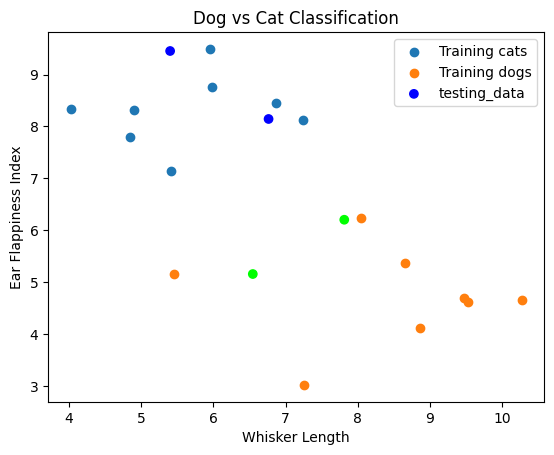

In [9]:
plt.scatter(X_train[y_train==0][:,0],X_train[y_train==0][:,1],label = "Training cats")
plt.scatter(X_train[y_train==1][:,0],X_train[y_train==1][:,1],label = "Training dogs")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap="brg",label="testing_data")
plt.xlabel("Whisker Length")
plt.ylabel("Ear Flappiness Index")
plt.title("Dog vs Cat Classification")
plt.legend()
plt.show()

In [10]:
#Implementing random linear classifier algorithm

def ramdon_linear_classifier(data_dogs,data_cats,k,d):
    best_error = float("inf")
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

        error = compute_error(data_dogs,data_cats,  theta,theta0)

        if error < best_error :
            best_error = error
            best_theta = theta
            best_theta0 = theta0

    return best_theta, best_theta0, best_error



def compute_error(data_dogs,data_cats,theta,theta0):
    error=0
    for x_dog in data_dogs:
        if np.dot(theta,x_dog) + theta0 <= 0:
            error+=1
    for x_cat in data_cats:
        if np.dot(theta,x_cat) + theta0 > 0:
            error+=1
    return error





In [11]:
#Running random linear classifier algorithn on training data
#k is iteration
k = 100
#number of features
d=2 
best_theta_train, best_theta0_train, train_error = ramdon_linear_classifier(X_train[y_train==0],X_train[y_train==1],k ,d)

In [12]:
train_error

0

In [17]:
x_vals_train = np.linspace(2, 10, 100)
y_vals_train = -(best_theta_train[0] / best_theta_train[1]) * x_vals_train - (best_theta0_train / best_theta_train[1])


In [14]:
x_vals_train

array([ 2.        ,  2.08080808,  2.16161616,  2.24242424,  2.32323232,
        2.4040404 ,  2.48484848,  2.56565657,  2.64646465,  2.72727273,
        2.80808081,  2.88888889,  2.96969697,  3.05050505,  3.13131313,
        3.21212121,  3.29292929,  3.37373737,  3.45454545,  3.53535354,
        3.61616162,  3.6969697 ,  3.77777778,  3.85858586,  3.93939394,
        4.02020202,  4.1010101 ,  4.18181818,  4.26262626,  4.34343434,
        4.42424242,  4.50505051,  4.58585859,  4.66666667,  4.74747475,
        4.82828283,  4.90909091,  4.98989899,  5.07070707,  5.15151515,
        5.23232323,  5.31313131,  5.39393939,  5.47474747,  5.55555556,
        5.63636364,  5.71717172,  5.7979798 ,  5.87878788,  5.95959596,
        6.04040404,  6.12121212,  6.2020202 ,  6.28282828,  6.36363636,
        6.44444444,  6.52525253,  6.60606061,  6.68686869,  6.76767677,
        6.84848485,  6.92929293,  7.01010101,  7.09090909,  7.17171717,
        7.25252525,  7.33333333,  7.41414141,  7.49494949,  7.57

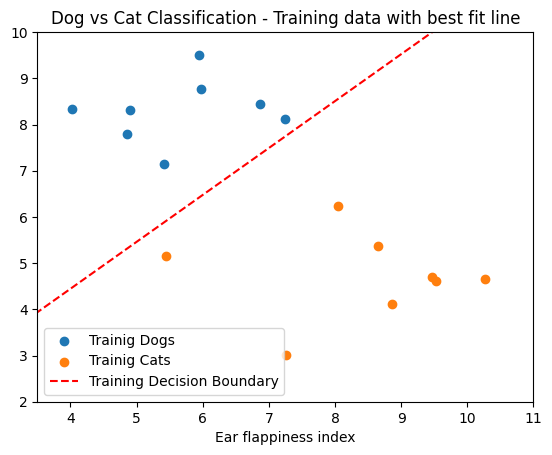

In [19]:
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1],label="Trainig Dogs")
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1],label="Trainig Cats")
plt.plot(x_vals_train,y_vals_train, color="red",linestyle="--", label="Training Decision Boundary")
plt.xlim([3.5,11])
plt.ylim([2,10])
plt.xlabel("Whisker Length")
plt.xlabel("Ear flappiness index")
plt.title("Dog vs Cat Classification - Training data with best fit line")
plt.legend()
plt.show()
